In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [74]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv",delimiter=",")
data=data.drop(columns=data.columns[:25])
data = data[data.result != 0]
print(len(data))
X=data.drop(columns=["result"])
y=data["result"]
data

15976


,result,home_player_1 overall_rating,home_player_1 potential,home_player_1 crossing,home_player_1 finishing,home_player_1 heading_accuracy,home_player_1 short_passing,home_player_1 volleys,home_player_1 dribbling,home_player_1 curve,home_player_1 free_kick_accuracy,home_player_1 long_passing,home_player_1 ball_control,home_player_1 acceleration,home_player_1 sprint_speed,home_player_1 agility,home_player_1 reactions,home_player_1 balance,home_player_1 shot_power,home_player_1 jumping,home_player_1 stamina,home_player_1 strength,home_player_1 long_shots,home_player_1 aggression,home_player_1 interceptions,home_player_1 positioning,home_player_1 vision,home_player_1 penalties,home_player_1 marking,home_player_1 standing_tackle,home_player_1 sliding_tackle,home_player_1 gk_diving,home_player_1 gk_handling,home_player_1 gk_kicking,home_player_1 gk_positioning,home_player_1 gk_reflexes,home_player_2 overall_rating,home_player_2 potential,home_player_2 crossing,home_player_2 finishing,...,away_player_10 gk_handling,away_player_10 gk_kicking,away_player_10 gk_positioning,away_player_10 gk_reflexes,id,away_player_11 overall_rating,away_player_11 potential,away_player_11 crossing,away_player_11 finishing,away_player_11 heading_accuracy,away_player_11 short_passing,away_player_11 volleys,away_player_11 dribbling,away_player_11 curve,away_player_11 free_kick_accuracy,away_player_11 long_passing,away_player_11 ball_control,away_player_11 acceleration,away_player_11 sprint_speed,away_player_11 agility,away_player_11 reactions,away_player_11 balance,away_player_11 shot_power,away_player_11 jumping,away_player_11 stamina,away_player_11 strength,away_player_11 long_shots,away_player_11 aggression,away_player_11 interceptions,away_player_11 positioning,away_player_11 vision,away_player_11 penalties,away_player_11 marking,away_player_11 standing_tackle,away_player_11 sliding_tackle,away_player_11 gk_diving,away_player_11 gk_handling,away_player_11 gk_kicking,away_player_11 gk_positioning,away_player_11 gk_reflexes
0,1,75.00,75.00,72.00,65.00,83.00,82.00,60.00,65.00,65.0,47.00,79.00,75.00,55.00,53.0,62.0,80.00,59.00,77.00,70.00,76.00,70.00,73.00,82.00,84.0,57.00,68.00,62.00,79.00,81.00,78.00,10.0,16.00,7.00,10.00,9.00,72.00,77.00,70.00,50.00,...,8.00,10.00,6.00,12.00,146,85.00,88.00,82.00,63.00,76.00,84.00,68.00,82.00,78.0,83.00,80.00,84.00,86.00,86.0,85.0,84.00,77.00,83.00,82.00,88.00,67.00,81.00,69.00,86.0,77.00,78.00,80.00,82.00,84.00,84.00,5.0,7.00,14.00,15.00,9.00
1,-1,76.00,76.00,81.00,77.00,43.00,76.00,76.00,75.00,79.0,83.00,78.00,77.00,76.00,74.0,78.0,77.00,80.00,75.00,60.00,73.00,48.00,79.00,39.00,38.0,76.00,76.00,66.00,29.00,25.00,30.00,11.0,10.00,15.00,8.00,7.00,65.00,76.00,48.00,31.00,...,13.00,6.00,9.00,6.00,154,65.00,72.00,31.00,21.00,66.00,56.00,18.00,32.00,14.0,42.00,42.00,59.00,65.00,53.0,62.0,58.00,73.00,47.00,77.00,67.00,66.00,22.00,66.00,53.0,57.00,61.00,63.00,64.00,66.00,64.00,9.0,21.00,42.00,21.00,21.00
2,1,58.00,63.00,25.00,25.00,25.00,24.00,25.00,25.00,25.0,25.00,24.00,25.00,44.00,46.0,35.0,44.00,59.00,24.00,54.00,26.00,59.00,25.00,21.00,22.0,25.00,25.00,27.00,25.00,25.00,25.00,63.0,53.00,54.00,55.00,63.00,58.00,68.00,53.00,53.00,...,64.00,65.00,60.00,72.00,156,66.00,72.00,56.00,66.00,56.00,64.00,64.00,69.00,62.0,34.00,52.00,70.00,81.00,79.0,77.0,60.00,65.00,56.00,63.00,65.00,65.00,56.00,50.00,20.0,60.00,60.00,60.00,19.00,27.00,26.00,14.0,10.00,14.00,6.00,12.00
3,1,75.00,75.00,72.00,65.00,83.00,82.00,60.00,65.00,65.0,47.00,79.00,75.00,55.00,53.0,62.0,80.00,59.00,77.00,70.00,76.00,70.00,73.00,82.00,84.0,57.00,68.00,62.00,79.00,81.00,78.00,10.0,16.00,7.00,10.00,9.00,72.00,77.00,70.00,50.00,...,13.00,9.00,13.00,5.00,163,68.00,68.00,70.00,47.00,47.00,64.00,49.00,71.00,60.0,61.00,62.00,71.00,76.00,78.0,79.0,66.00,72.00,72.00,74.00,85.00,66.00,66.00,48.00,12.0,68.00,59.00,57.00,12.00,12.00,14.00,8.0,8.00,11.00,9.00,6.00
5,1,76.00,78.00,63.00,58.00,56.00,84.00,60.00,74.00,66.0,66.00,80.00,82.00,57.00,57.0,76.0,77.00,77.00,66.00,

In [120]:
t_X,val_X,t_y,val_y=train_test_split(X,y,test_size=0.2)
train_X,test_X,train_y,test_y=train_test_split(t_X,t_y,test_size=0.2)


In [47]:
print("TRAIN: ",len(train_X),"    ",len(train_y))
print("TEST: ",len(test_X),"    ",len(test_y))
print("VALIDATION: ",len(val_X),"    ",len(val_y))

TRAIN:  10224      10224
TEST:  2556      2556
VALIDATION:  3196      3196


In [121]:
rf = RandomForestClassifier(n_estimators=100,criterion="entropy")
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred=rf.predict(test_X)
score = accuracy_score(test_y,y_pred)

print("RANDOM FOREST 200 trees:   " ,score)

RANDOM FOREST 200 trees:    0.6251956181533647


In [80]:
y_valpreds = rf.predict(val_X)
val_score = accuracy_score(val_y,y_valpreds)
val_score

IndexError: ignored

In [ ]:
print("RANDOM FOREST 200 trees:   " ,score)
print("VALIDATION SCORE:  ",val_score)

RANDOM FOREST 200 trees:    0.9175438596491228
VALIDATION SCORE:   0.9143859649122807


In [78]:
i=0
best_score=0
model=None
k=1

while(k<20):
  t_X,val_X,t_y,val_y=train_test_split(X,y,test_size=0.2)
  train_X,test_X,train_y,test_y=train_test_split(t_X,t_y,test_size=0.2)
  rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=k)
  rf.fit(train_X, train_y)
  y_pred=rf.predict(test_X)
  score = accuracy_score(test_y,y_pred)
  if(score>best_score):
    best_score=score
    model=rf
    
  k+=1
  print(score) 

0.4710526315789474
0.49736842105263157
0.46111111111111114
0.47982456140350876
0.4760233918128655
0.4757309941520468
0.46578947368421053
0.4722222222222222
0.45994152046783626
0.4824561403508772
0.47017543859649125


KeyboardInterrupt: ignored

In [79]:
print(best_score)

0.49736842105263157


In [122]:
ada=AdaBoostClassifier(n_estimators=200)
ada.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [82]:
y_pred_ada=ada.predict(test_X)
score_ada=accuracy_score(test_y,y_pred_ada)
score_ada

0.4502923976608187

In [143]:
from sklearn.metrics import plot_roc_curve,roc_curve,plot_confusion_matrix,roc_auc_score
from matplotlib import pyplot as plt 




def plot_comparing_roc_curves(model_A,model_B,X_test,y_test):
  #works only with binary classification

  pred_A = model_A.predict(X_test)
  pred_B = model_B.predict(X_test)
  fig, (ax1) = plt.subplots(1)
  plt.rcParams["figure.figsize"] = (40,10)
  
  plot_roc_curve(model_A,X_test,y_test,ax=ax1)
  plot_roc_curve(model_B,X_test,y_test,ax=ax1)
  plt.show()

def plot_confusion_matrixes(modelA,modelB,X_test,y_test):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  plt.rcParams["figure.figsize"] = (40,10)
  fig.suptitle('Confusion matrixes on validation set')
  plot_confusion_matrix(modelA,X_test,y_test,ax=ax1)
  plot_confusion_matrix(modelB,X_test,y_test,ax=ax2)
  plt.show()

def plot_label_distribution(data):
  wins,ties,losses=data.groupby("result")["id"].count()

  fig = plt.figure(figsize =(10, 7)) 
  
  plt.bar(["wins","ties","losses"], (wins,ties,losses),color=['green', 'gray', 'red'],width=0.5) 
  plt.show() 

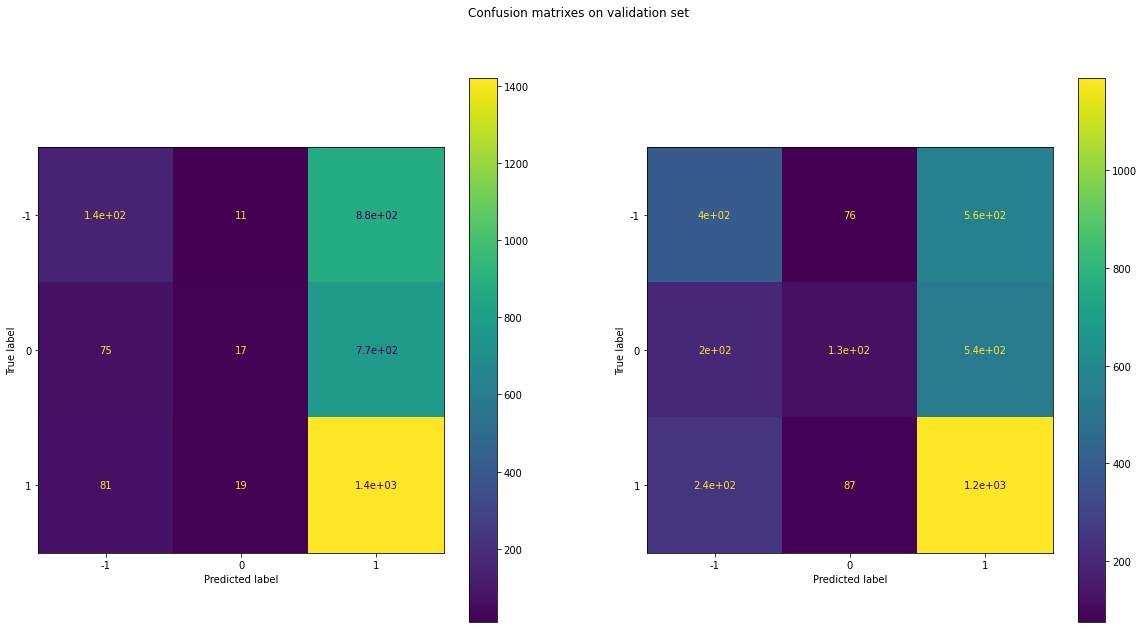

In [97]:
plot_confusion_matrixes(rf,ada,test_X,test_y)

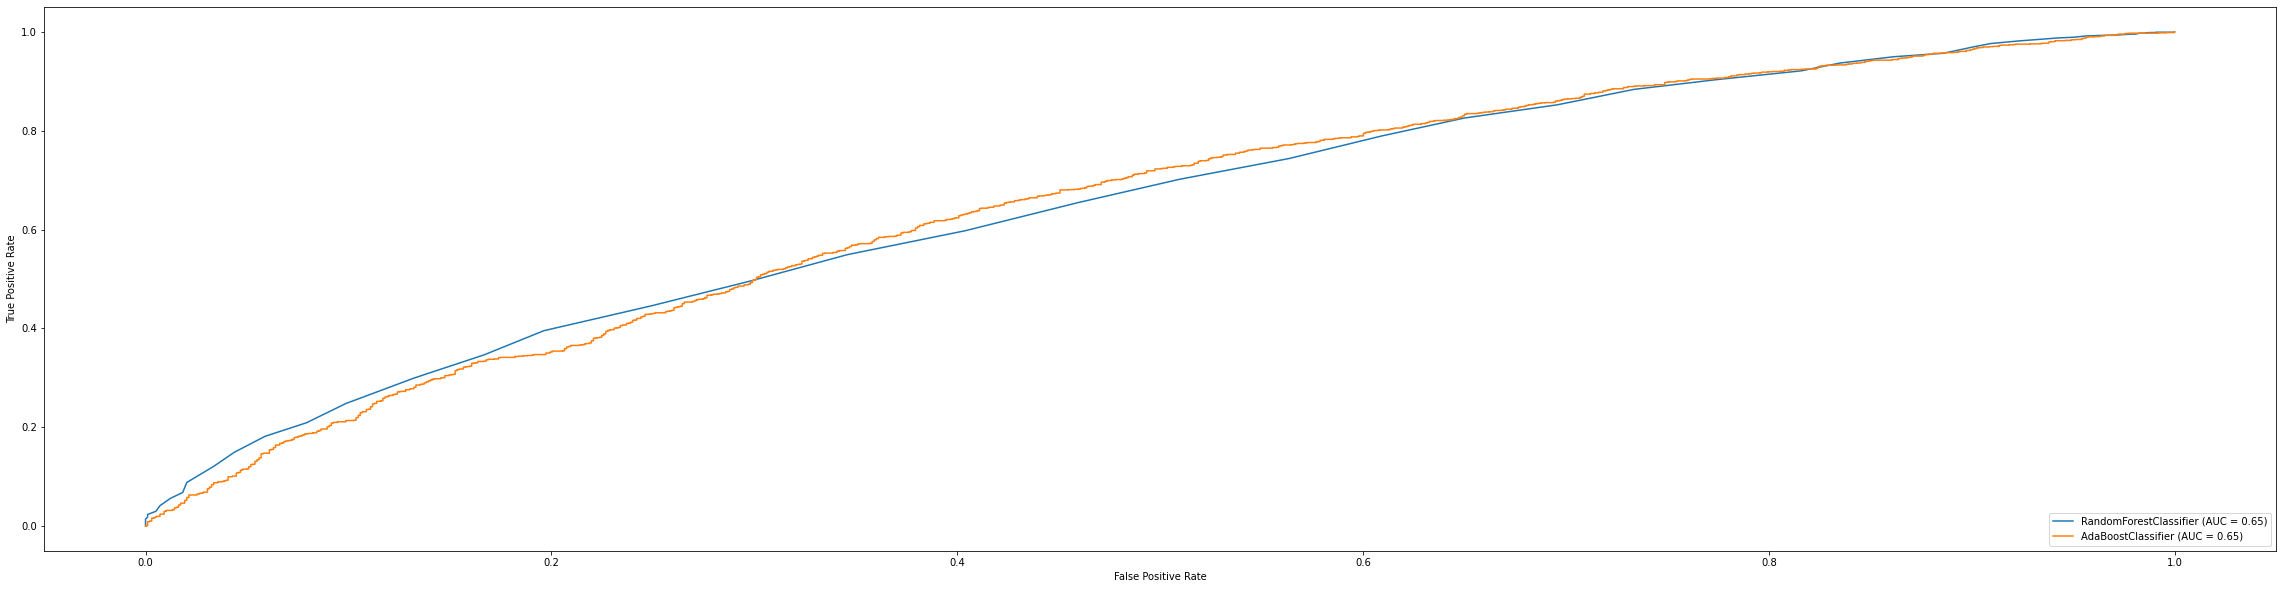

In [144]:
plot_comparing_roc_curves(rf,ada,test_X,test_y)

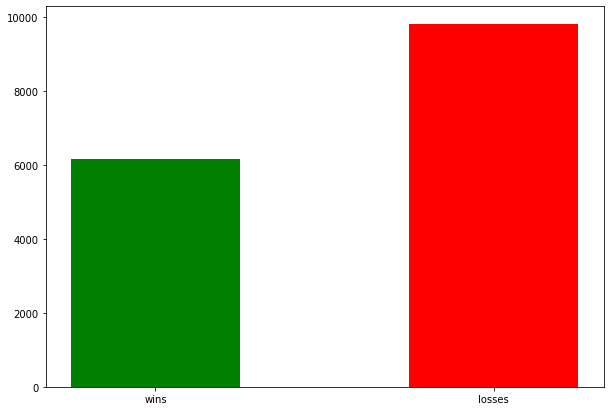

In [119]:
plot_label_distribution(data)